In [224]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os as os
import zipfile as zp
import csv as csv
import urllib as ulr
from pandas import DataFrame


%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [225]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")


In [226]:
getCitiBikeCSV('201505')
getCitiBikeCSV('201506')
getCitiBikeCSV('201507')
getCitiBikeCSV('201508')

file in place, you can continue
file in place, you can continue
file in place, you can continue
file in place, you can continue


In [197]:
data_2015_05 = pd.read_csv('/home/cusp/nm2762/PUIdata/201505-citibike-tripdata.csv')
data_2015_06 = pd.read_csv('/home/cusp/nm2762/PUIdata/201506-citibike-tripdata.csv')
data_2015_07 = pd.read_csv('/home/cusp/nm2762/PUIdata/201507-citibike-tripdata.csv')
data_2015_08 = pd.read_csv('/home/cusp/nm2762/PUIdata/201508-citibike-tripdata.csv')

In [198]:
frames = [data_2015_05, data_2015_06, data_2015_07, data_2015_08]
results = pd.concat(frames)
results = results.reset_index(drop=True)
results

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,415,5/1/2015 00:00:11,5/1/2015 00:07:06,477,W 41 St & 8 Ave,40.756405,-73.990026,442,W 27 St & 7 Ave,40.746647,-73.993915,17012,Subscriber,1981.0,1
1,1523,5/1/2015 00:00:28,5/1/2015 00:25:52,293,Lafayette St & E 8 St,40.730287,-73.990765,324,DeKalb Ave & Hudson Ave,40.689888,-73.981013,17390,Customer,NaN,0
2,642,5/1/2015 00:00:52,5/1/2015 00:11:35,380,W 4 St & 7 Ave S,40.734011,-74.002939,507,E 25 St & 2 Ave,40.739126,-73.979738,15003,Subscriber,1990.0,1
3,367,5/1/2015 00:00:48,5/1/2015 00:06:55,537,Lexington Ave & E 24 St,40.740259,-73.984092,280,E 10 St & 5 Ave,40.733320,-73.995101,14788,Subscriber,1978.0,1
4,2734,5/1/2015 00:00:51,5/1/2015 00:46:26,426,West St & Chambers St,40.717548,-74.013221,327,Vesey Pl & River Terrace,40.715338,-74.016584,21068,Subscriber,1956.0,2
5,359,5/1/2015 00:01:07,5/1/2015 00:07:07,439,E 4 St & 2 Ave,40.726281,-73.989780,302,Avenue D & E 3 St,40.720828,-73.977932,17406,Subscriber,1961.0,1
6,236,5/1/2015 00:01:05,5/1/2015 00:05:02,401,Allen St & Rivington St,40.720196,-73.989978,438,St Marks Pl & 1 Ave,40.727791,-73.985649,15005,Subscriber,1971.0,1
7,1991,5/1/2015 00:01:16,5/1/2015 00:34:28,532,S 5 Pl & S 4 St,40.710451,-73.960876,529,W 42 St & 8 Ave,40.757570,-73.990985,15566,Subscriber,1993.0,1
8,101,5/1/2015 00:01:59,5/1/2015 00:03:40,320,Leonard St & Church St,40.717571,-74.005549,276,Duane St & Greenwich St,40.717488,-74.010455,19245,Subscriber,1958.0,1
9,1070,5/1/2015 00:01:55,5/1/2015 00:19:45,297,E 15 St & 3 Ave,40.734232,-73.986923,316,Fulton St & William St,40.709560,-74.006536,18382,Subscriber,1965.0,1


# test female male age distribution

In [199]:
new_mf_a = results.drop (['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid'], axis=1)

new_mf_a = new_mf_a[new_mf_a['gender'] != 0]

new_mf_a['ageM'] = 2015 - new_mf_a['birth year'][(new_mf_a['usertype'] == 'Subscriber') & (new_mf_a['gender'] == 1)]
new_mf_a['ageF'] = 2015 - new_mf_a['birth year'][(new_mf_a['usertype'] == 'Subscriber') & (new_mf_a['gender'] == 2)]

new_mf_a['ageM'].dropna(inplace=True)
new_mf_a['ageF'].dropna(inplace=True)

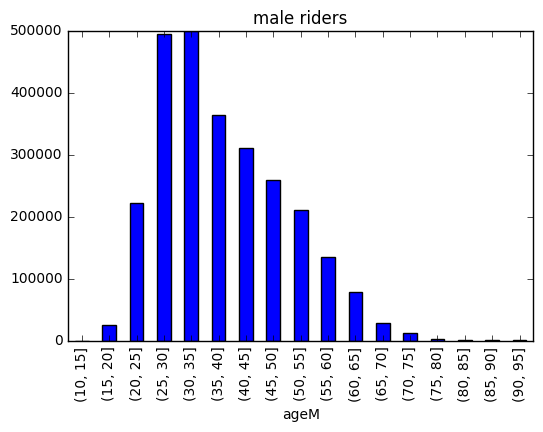

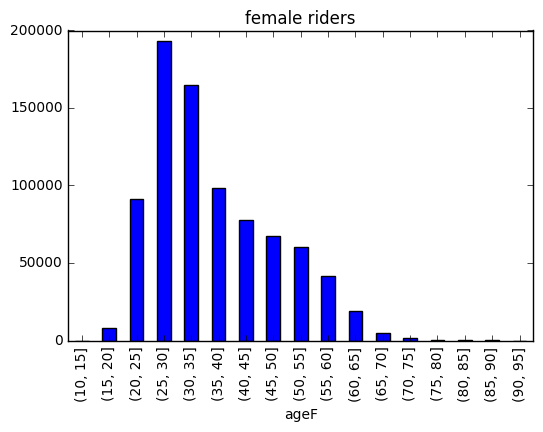

In [200]:
bins = np.arange(10, 99, 5)

axM = new_mf_a.ageM.groupby(pd.cut(new_mf_a.ageM, bins)).agg([count_nonzero]).plot(kind='bar',                                                                 legend=False)
axM.set_title("male riders")

axF = new_mf_a.ageF.groupby(pd.cut(new_mf_a.ageF, bins)).agg([count_nonzero]).plot(kind='bar',                                                                legend=False)
axF.set_title("female riders")

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.000104
(20, 25]       0.026601
(25, 30]       0.072367
(30, 35]       0.082077
(35, 40]       0.063028
(40, 45]       0.038989
(45, 50]       0.022098
(50, 55]       0.015032
(55, 60]       0.014300
(60, 65]       0.007270
(65, 70]       0.002182
(70, 75]       0.000104
(75, 80]       0.000224
(80, 85]       0.000024
(85, 90]       0.000020
(90, 95]       0.000000


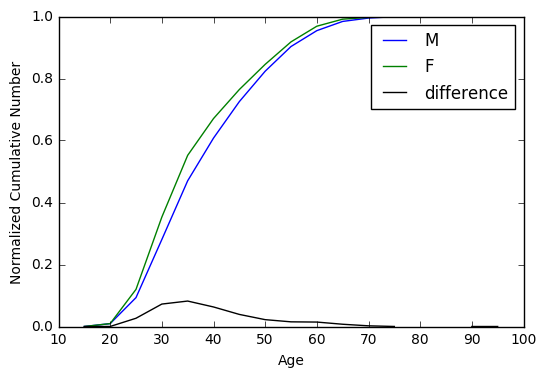

In [201]:
csM=new_mf_a.ageM.groupby(pd.cut(new_mf_a.ageM, bins)).agg([count_nonzero]).cumsum()

csF=new_mf_a.ageF.groupby(pd.cut(new_mf_a.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()



In [202]:
import scipy.stats


# First test 

In [203]:
ks = scipy.stats.ks_2samp(new_mf_a.ageM, new_mf_a.ageF)
print (ks)

Ks_2sampResult(statistic=0.1085570248436947, pvalue=0.0)


In [204]:
datamale = new_mf_a[new_mf_a['gender'] == 1]
datafemale = new_mf_a[new_mf_a['gender'] == 2]


datamale.drop(['ageF'], axis=1, inplace=True)
datafemale.drop(['ageM'], axis=1, inplace=True)

datamale['ageM'].dropna(inplace= True)
datafemale['ageF'].dropna(inplace= True)

damale = datamale.reset_index(drop=True)
datafemale = datafemale.reset_index(drop=True)

oneeach200male = datamale.iloc[::200,:]
oneeach200female = datafemale.iloc[::200,:]

ks = scipy.stats.ks_2samp(oneeach200male.ageM, oneeach200female.ageF)
print (ks)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Ks_2sampResult(statistic=0.08611321119457599, pvalue=8.3500074802011769e-21)


# Second test

In [205]:
datamalerisize = datamale.iloc[:827770]
scipy.stats.pearsonr(datamalerisize.ageM, datafemale.ageF)


(nan, 1.0)

# Third test


In [206]:
scipy.stats.spearmanr(datamalerisize.ageM, datafemale.ageF)

SpearmanrResult(correlation=-0.00036403969777161911, pvalue=0.74048615270696239)

# Day and Night age Distribution

In [207]:
new_dn_a = results.drop (['tripduration', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'stoptime', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'gender'], axis=1)


new_dn_a = new_dn_a[new_dn_a['usertype'] == 'Subscriber']


#new_dn_a
#new_dn_a = new_dn_a[new_dn_a['usertype'] == 'Subriber']


In [208]:
new_dn_a.drop(['usertype'], axis=1, inplace=True)


# DEFINE DAY-TRIP AS ALL THE TRIP STARTING BETWEEN 6.AM AND 6.PM.  


# DEFINE NIGHT-TRIP AS ALL THE TRIP STARTING BETWEEN 6.PM AND 6.AM

In [209]:
new_dn_a = new_dn_a.reset_index(drop=True)
new_dn_a['ageM'] = 2015 - new_dn_a['birth year']
new_dn_a

,starttime,birth year,ageM
0,5/1/2015 00:00:11,1981.0,34.0
1,5/1/2015 00:00:52,1990.0,25.0
2,5/1/2015 00:00:48,1978.0,37.0
3,5/1/2015 00:00:51,1956.0,59.0
4,5/1/2015 00:01:07,1961.0,54.0
5,5/1/2015 00:01:05,1971.0,44.0
6,5/1/2015 00:01:16,1993.0,22.0
7,5/1/2015 00:01:59,1958.0,57.0
8,5/1/2015 00:01:55,1965.0,50.0
9,5/1/2015 00:02:13,1974.0,41.0


In [210]:
new_dn_a['ageM'] = 2015 - new_dn_a['birth year']
new_dn_a.drop(['birth year'], axis=1, inplace=True)